1. FIND S ALGORITHM

In [21]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ponna\Downloads\ENJOYSPORT.csv")
df.values.tolist()
print(df)

n = len(df.columns) - 1  # Get the number of columns in the DataFrame
S = ['?'] * n  # Initialize with '?'
print("Initial hypothesis:", S)
print("FIND S ALGORITHM")
S = df.iloc[0, :-1].tolist()  # Extract the first row (example) without the last column

for i in range(len(df)):
    if df.iloc[i, n] == 1:  # Check if the last column is "yes"
        for j in range(n):
            if df.iloc[i, j] != S[j]:
                S[j] = '?'
    print("\nTraining example no {0}, Hypothesis is: {1}".format(i + 1, S))

print("\nMaximally specific hypothesis is:", S)


     Sky AirTemp Humidity    Wind Water Forecast  EnjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same           1
1  Sunny    Warm     High  Strong  Warm     Same           1
2  Rainy    Cold     High  Strong  Warm   Change           0
3  Sunny    Warm     High  Strong  Cool   Change           1
Initial hypothesis: ['?', '?', '?', '?', '?', '?']
FIND S ALGORITHM

Training example no 1, Hypothesis is: ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']

Training example no 2, Hypothesis is: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']

Training example no 3, Hypothesis is: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']

Training example no 4, Hypothesis is: ['Sunny', 'Warm', '?', 'Strong', '?', '?']

Maximally specific hypothesis is: ['Sunny', 'Warm', '?', 'Strong', '?', '?']


2. CANDIDATE ELIMINATION

In [1]:
import pandas as pd

df = pd.read_csv(r"D:\6TH SEM\ENJOYSPORT.csv")
a = df.values.tolist()
print(df)

n = len(a[0]) - 1
print("\n The initial value of hypothesis: ")
s = ['0'] * n
g = ['?'] * n
print("\n The most specific hypothesis S0:", s)
print("\n The most general hypothesis G0:", g)
s = a[0][:-1]
temp = []
print("\n Candidate Elimination algorithm\n")

for i in range(len(a)):
    if a[i][n] == 1:  # Use Positive for manufacture.csv
        for j in range(n):
            if a[i][j] != s[j]:
                s[j] = '?'
        for j in range(n):
            for k in range(len(temp)):  # Use len(temp)-1 for manufacture.csv
                if temp[k][j] != '?' and temp[k][j] != s[j]:
                    del temp[k]

    if a[i][n] == 0:  # Use Negative for manufacture.csv
        for j in range(n):
            if s[j] != a[i][j] and s[j] != '?':
                g[j] = s[j]
                if g not in temp:
                    temp.append(g)
                g = ['?'] * n

    print("\n For Training Example No :{0} the hypothesis is S{0}: {1}".format(i + 1, s))
    if len(temp) == 0:
        print(" For Training Example No :{0} the hypothesis is G{0}: {1}".format(i + 1, g))
    else:
        print(" For Training Example No :{0} the hypothesis is G{0}: {1}".format(i + 1, temp))


     Sky AirTemp Humidity    Wind Water Forecast  EnjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same           1
1  Sunny    Warm     High  Strong  Warm     Same           1
2  Rainy    Cold     High  Strong  Warm   Change           0
3  Sunny    Warm     High  Strong  Cool   Change           1

 The initial value of hypothesis: 

 The most specific hypothesis S0: ['0', '0', '0', '0', '0', '0']

 The most general hypothesis G0: ['?', '?', '?', '?', '?', '?']

 Candidate Elimination algorithm


 For Training Example No :1 the hypothesis is S1: ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
 For Training Example No :1 the hypothesis is G1: ['?', '?', '?', '?', '?', '?']

 For Training Example No :2 the hypothesis is S2: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
 For Training Example No :2 the hypothesis is G2: ['?', '?', '?', '?', '?', '?']

 For Training Example No :3 the hypothesis is S3: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
 For Training Example No :

3. DECISION TREE BASED 1D3

In [20]:
import pandas as pd
import numpy as np
from collections import Counter
import math

# Load the dataset
df = pd.read_csv(r"D:\6TH SEM\tennis.csv")

# Display the first few rows of the dataframe
print(df.head())

# Define the entropy calculation function
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = np.sum([(-counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

# Define the information gain calculation function
def InfoGain(data, split_attribute_name, target_name="play"):
    total_entropy = entropy(data[target_name])
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data.where(data[split_attribute_name] == vals[i]).dropna()[target_name]) for i in range(len(vals))])
    Information_Gain = total_entropy - weighted_entropy
    return Information_Gain

# Define the ID3 algorithm function
def ID3(data, originaldata, features, target_attribute_name="play", parent_node_class = None):
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    elif len(data) == 0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name], return_counts=True)[1])]
    elif len(features) == 0:
        return parent_node_class
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]
        
        item_values = [InfoGain(data, feature, target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        tree = {best_feature: {}}
        
        features = [i for i in features if i != best_feature]
        
        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()
            
            subtree = ID3(sub_data, data, features, target_attribute_name, parent_node_class)
            tree[best_feature][value] = subtree
            
        return tree

# Train the ID3 model
features = list(df.columns)
features.remove("play")
tree = ID3(df, df, features)

# Display the decision tree
import pprint
pprint.pprint(tree)

# Classify a new sample
def classify(query, tree, default = 'Yes'):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]] 
            except:
                return default

            result = tree[key][query[key]]
            if isinstance(result, dict):
                return classify(query, result)
            else:
                return result

# Example query
query = {'outlook': 'overcast', 'temp': 'hot', 'humidity': 'high', 'windy': 'FALSE'}
print("Classification:", classify(query, tree))


    outlook  temp humidity  windy play
0     sunny   hot     high  False   no
1     sunny   hot     high   True   no
2  overcast   hot     high  False  yes
3     rainy  mild     high  False  yes
4     rainy  cool   normal  False  yes
{'outlook': {'overcast': 'yes',
             'rainy': {'windy': {False: 'yes', True: 'no'}},
             'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}
Classification: yes


4. ARTIFICIAL NEURAL NETWORK

In [4]:
import numpy as np

X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)

X = X / np.amax(X, axis=0)  # maximum of X array longitudinally
y = y / 100

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

# Variable initialization
epoch = 5000  # Setting training iterations
lr = 0.1      # Setting learning rate
inputlayer_neurons = 2     # number of features in data set
hiddenlayer_neurons = 3    # number of hidden layers neurons
output_neurons = 1         # number of neurons at output layer

# Weight and bias initialization
wh = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
bh = np.random.uniform(size=(1, hiddenlayer_neurons))
wout = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))
bout = np.random.uniform(size=(1, output_neurons))

for i in range(epoch):
    # Forward Propagation
    hinp1 = np.dot(X, wh)
    hinp = hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1 = np.dot(hlayer_act, wout)
    outinp = outinp1 + bout
    output = sigmoid(outinp)
    
    # Backpropagation
    EO = y - output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)
    
    # How much hidden layer weights contributed to error
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    
    # Update weights
    wout += hlayer_act.T.dot(d_output) * lr
    wh += X.T.dot(d_hiddenlayer) * lr

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n", output)


Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89340012]
 [0.88281686]
 [0.893789  ]]


5. NAIVE BAYESIAN CLASSIFIER

In [1]:
import csv
import random
import math

def loadcsv(filename):
    with open(filename, "r") as file:
        lines = csv.reader(file)
        dataset = list(lines)
        headers = dataset[0]  # Extract column headers
        dataset = dataset[1:]  # Exclude the first row (column headers)
        for i in range(len(dataset)):
            dataset[i] = [float(x) for x in dataset[i]]
        return headers, dataset

def splitdataset(dataset, splitratio):
    trainsize = int(len(dataset) * splitratio)
    trainset = []
    copy = list(dataset)
    while len(trainset) < trainsize:
        index = random.randrange(len(copy))
        trainset.append(copy.pop(index))
    return [trainset, copy]

def separatebyclass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

def summarizebyclass(dataset):
    separated = separatebyclass(dataset)
    summaries = {}
    for classvalue, instances in separated.items():
        summaries[classvalue] = summarize(instances)
    return summaries

def calculateprobability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculateclassprobabilities(summaries, inputvector):
    probabilities = {}
    for classvalue, classsummaries in summaries.items():
        probabilities[classvalue] = 1
        for i in range(len(classsummaries)):
            mean, stdev = classsummaries[i]
            x = inputvector[i]
            probabilities[classvalue] *= calculateprobability(x, mean, stdev)
    return probabilities

def predict(summaries, inputvector):
    probabilities = calculateclassprobabilities(summaries, inputvector)
    bestlabel, bestprob = None, -1
    for classvalue, probability in probabilities.items():
        if bestlabel is None or probability > bestprob:
            bestprob = probability
            bestlabel = classvalue
    return bestlabel

def getpredictions(summaries, testset):
    predictions = []
    for i in range(len(testset)):
        result = predict(summaries, testset[i])
        predictions.append(result)
    return predictions

def getaccuracy(testset, predictions):
    correct = 0
    for i in range(len(testset)):
        if testset[i][-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testset))) * 100.0

def main():
    filename = r"C:\Users\ponna\Downloads\diabetes.csv"
    splitratio = 0.67
    headers, dataset = loadcsv(filename)
    trainingset, testset = splitdataset(dataset, splitratio)
    print('Split {0} rows into train={1} and test={2} rows'.format(len(dataset), len(trainingset), len(testset)))
    summaries = summarizebyclass(trainingset)
    predictions = getpredictions(summaries, testset)
    accuracy = getaccuracy(testset, predictions)
    print('Accuracy of the classifier is: {0}%'.format(accuracy))

main()


Split 768 rows into train=514 and test=254 rows
Accuracy of the classifier is: 71.25984251968504%


6. BAYESIAN NETWORK CONSIDERING HEART DISEASE

In [2]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
file_path=r"C:\Users\ponna\Downloads\heart (1).csv"
heartdisease=pd.read_csv(file_path)
heartdisease=heartdisease.replace('?','NaN')
print("Sample instances from the dataset are given below")
print(heartdisease.head())
print("\n Attributes and datatypes")
print(heartdisease.dtypes)
model=BayesianNetwork([('age','heartdisease'),('sex','heartdisease'),('exang','heartdisease'),('cp','heartdisease'),('heartdisease', 'restecg'),('heartdisease', 'chol')])
print('\nLearning CPD using Maximum Likelihood Estimators')
model.fit(heartdisease, estimator=MaximumLikelihoodEstimator)

# Inferencing with Bayesian Network
print('\nInferencing with Bayesian Network:')
HeartDisease_infer = VariableElimination(model)

# Computing the Probability of HeartDisease given restecg
print('\n1. Probability of HeartDisease given evidence= restecg:1')
q1 = HeartDisease_infer.query(variables=['heartdisease'], evidence={'restecg': 1})
print(q1)

# Computing the Probability of HeartDisease given cp
print('\n2. Probability of HeartDisease given evidence= cp:2')
q2 = HeartDisease_infer.query(variables=['heartdisease'], evidence={'cp': 2})
print(q2)

Sample instances from the dataset are given below
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  heartdisease  
0  0    6             0  
1  3    3             2  
2  2    7             1  
3  0    3             0  
4  0    3             0  

 Attributes and datatypes
age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca              

7. EM ALGORITHM- K MEANS AND GMM CLUSTERING

Silhouette Score (K-Means): 0.5528190123564095
Silhouette Score (GMM): 0.5011761635067206


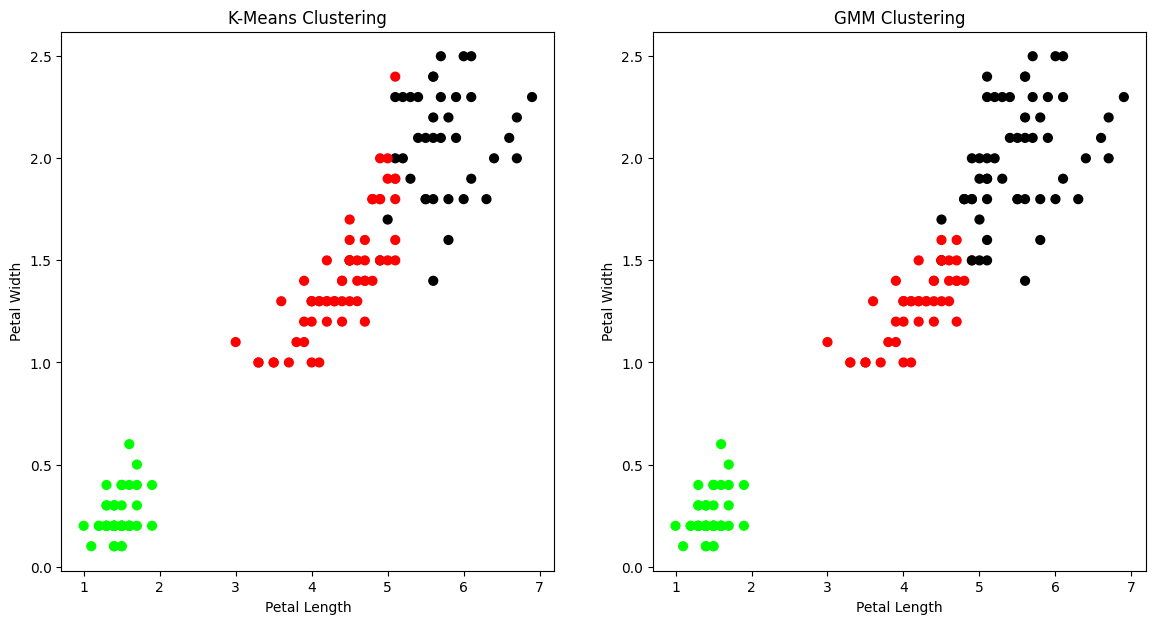

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Build the K-Means Model
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(X)
kmeans_labels = kmeans_model.labels_

# Visualize K-Means Clustering
plt.figure(figsize=(14, 7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1, 2, 1)
plt.scatter(X['Petal_Length'], X['Petal_Width'], c=colormap[kmeans_labels], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Build Gaussian Mixture Model (GMM) using EM Algorithm
gmm = GaussianMixture(n_components=3, random_state=0).fit(X)
gmm_labels = gmm.predict(X)

# Visualize GMM Clustering
plt.subplot(1, 2, 2)
plt.scatter(X['Petal_Length'], X['Petal_Width'], c=colormap[gmm_labels], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Calculate silhouette scores for both clustering methods
silhouette_kmeans = metrics.silhouette_score(X, kmeans_labels)
silhouette_gmm = metrics.silhouette_score(X, gmm_labels)
print("Silhouette Score (K-Means):", silhouette_kmeans)
print("Silhouette Score (GMM):", silhouette_gmm)

plt.show()


8. KNN

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets

# Iris Plants Dataset, dataset contains 150 (50 in each of three classes)
# Number of Attributes: 4 numeric, predictive attributes and the Class

# The x variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.
iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
print(x,"\n",y)
# Splits the dataset into 70% train data and 30% test data. This means that out of total 150 records, the training set will contain 105 records and the test set contains 45 of those records
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Train the K-Nearest Neighbors model with k=5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(x_test)

# Print the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

# Print accuracy metrics
print('Accuracy Metrics')
print(classification_report(y_test, y_pred))


     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns] 
      Targets
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]
Confusion Matrix
[[11  0  0]
 [ 0 14  1]
 [ 0  1 18]]
Accuracy Metrics
              precision    

c:\Users\ponna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


9. LWR ALGORIHTM

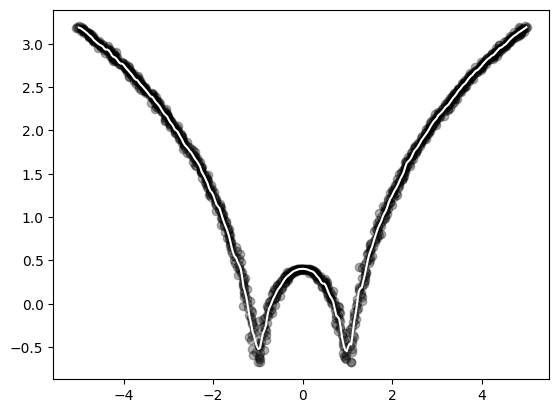

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generating Data
x = np.linspace(-5, 5, 1000)
y = np.log(np.abs((x ** 2) - 1) + 0.5)
x = x + np.random.normal(scale=0.05, size=1000)
plt.scatter(x, y,color='black', alpha=0.3)

# Locally Weighted Regression Functions
def radial_kernel(x0, x, tau):
    return np.exp(np.sum((x - x0) ** 2, axis=1) / (-2 * tau ** 2))

def local_regression(x0, x, y, tau):
    x0 = np.r_[1, x0]
    x = np.c_[np.ones(len(x)), x]
    xw = x.T * radial_kernel(x0, x, tau)
    beta = np.linalg.pinv(xw @ x) @ xw @ y
    return x0 @ beta

# Plotting Function
def plot_lr(tau):
    domain = np.linspace(-5, 5, num=300)
    pred = [local_regression(x0, x, y, tau) for x0 in domain]
    plt.plot(domain, pred, color="white")
    plt.show()  # Corrected show() function

# Plotting with specified bandwidth (tau)
plot_lr(0.03)


10. SWM CLASSIFIER 

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



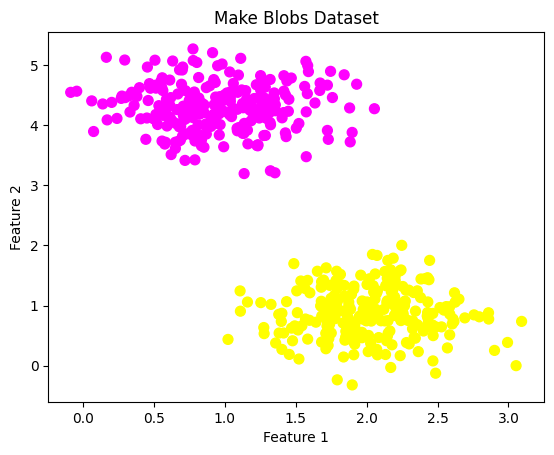

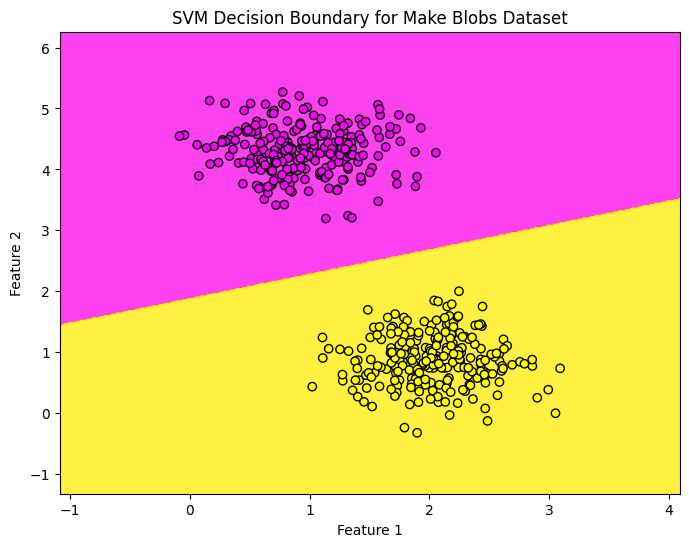

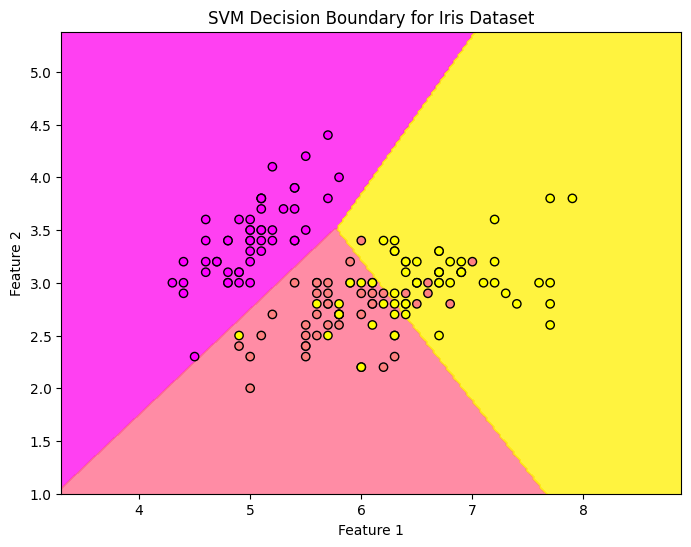

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_blobs  # Importing make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for test data 
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(report)

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(8, 6))
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.spring, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Generating and plotting the make_blobs dataset
X_blob, Y_blob = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.40)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=Y_blob, s=50, cmap='spring')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Blobs Dataset')
plt.show()

# Training an SVM classifier on the make_blobs dataset
clf_blob = SVC(kernel='linear')
clf_blob.fit(X_blob, Y_blob)

# Plotting the decision boundary for the make_blobs dataset
plot_decision_boundary(clf_blob, X_blob, Y_blob, 'SVM Decision Boundary for Make Blobs Dataset')

# Loading the Iris dataset
iris = load_iris()
X_iris = iris.data[:, :2]  # considering only the first two features for visualization
y_iris = iris.target

# Splitting the Iris dataset into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

# Training an SVM classifier on the Iris dataset
clf_iris = SVC(kernel='linear')
clf_iris.fit(X_train_iris, y_train_iris)

# Plotting the decision boundary for the Iris dataset
plot_decision_boundary(clf_iris, X_iris, y_iris, 'SVM Decision Boundary for Iris Dataset')


PART B 

In [21]:
#VOTING CLASSIFIER
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import metrics

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
clf1 = LogisticRegression(max_iter=200)
clf2 = DecisionTreeClassifier()
clf3 = SVC(kernel='linear', probability=True)

# Create the VotingClassifier
eclf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)], voting='soft')

# Train the VotingClassifier
eclf.fit(X_train, y_train)
# Predict the labels for the test set
pred = eclf.predict(X_test)
print(pred)
print(y_test)
# Calculate and print the accuracy
accuracy = metrics.accuracy_score(y_test,pred)
matrix=metrics.confusion_matrix(pred,y_test)
print(matrix)
print("Accuracy:", accuracy)


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0


In [ ]:
#Support Vector Machine (SVM) Classifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear kernel
clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
pred1=clf_linear.predict(X_test)
print("Linear Accuracy:", metrics.accuracy_score(pred1, y_test))

# Polynomial kernel
clf_poly = SVC(kernel='poly')
clf_poly.fit(X_train, y_train)
pred2=clf_poly.predict(X_test)
print("Polynomial Accuracy:", metrics.accuracy_score(pred2, y_test))

# Radial Basis Function (RBF) kernel
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
pred3=clf_rbf.predict(X_test)
print("RBF Accuracy:", metrics.accuracy_score(pred3, y_test))

In [22]:
#PERCEPTRON
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# Load the dataset
df = pd.read_csv(r"D:\6TH SEM\ENJOYSPORT.csv")
print(df)
# Specify feature columns and label column
xcols = ['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast']
ycols = 'EnjoySport'

# Initialize LabelEncoder for each column
label_encoders = {col: LabelEncoder() for col in xcols + [ycols]}

# Encode each column
for col in xcols + [ycols]:
    df[col] = label_encoders[col].fit_transform(df[col])

# Split the dataset into features and labels
X = df[xcols].values
y = df[ycols].values

# Print encoded features and labels
print("Encoded Features:\n", X)
print("Encoded Labels:\n", y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Perceptron model
clf = Perceptron()
clf.fit(X_train, y_train)

# Predict on the test set
pred = clf.predict(X_test)

# Calculate and print the accuracy
print("Accuracy:", metrics.accuracy_score(y_test, pred))

     Sky AirTemp Humidity    Wind Water Forecast  EnjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same           1
1  Sunny    Warm     High  Strong  Warm     Same           1
2  Rainy    Cold     High  Strong  Warm   Change           0
3  Sunny    Warm     High  Strong  Cool   Change           1
Encoded Features:
 [[1 1 1 0 1 1]
 [1 1 0 0 1 1]
 [0 0 0 0 1 0]
 [1 1 0 0 0 0]]
Encoded Labels:
 [1 1 0 1]
Accuracy: 1.0


In [ ]:
#LOGISTIC REGRESSION
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print(y_test)
print(pred)
print("Accuracy:", metrics.accuracy_score(pred, y_test))

In [23]:
#ANN
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by scaling them
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the MLPClassifier with adjusted parameters
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=0.0001,
                    solver='adam', random_state=42, learning_rate_init=0.001, early_stopping=True)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the final number of iterations
print("Iterations:", clf.n_iter_)

Accuracy: 0.5333333333333333
Iterations: 24
